**UAS**
==========================================================================================================================================
**ANALISA PROFIL MAHASISWA UNIVERSITAS MERCU BUANA TERHADAP MOTIVASI BELAJAR MENGGUNAKAN ALGORITMA RANDOM FOREST**
==========================================================================================================================================
FAAZA NAIMA        (41520120010)
==========================================================================================================================================
selected_columns = ['status', 'umb','jurusan','kesesuaian_jurusan','kesesuaian_harapan', 'motivasi', 'kompetensi_dosen', 'rerata', 'ipk']

target_variable = 'motivasi'
==========================================================================================================================================/

## BUSINESS UNDERSTANDING

Surveyor ingin mengetahui faktor-faktor yang mempengaruhi motivasi belajar mahasiswa universitas mercu buaana, termasuk kondisi internal berupa status, kesesuaian harapan, ipk, rerata, dan eksternal berupa cabang kampus, kesesuaian_jurusan, serta kompetensi dosen. Surveyor juga ingin mengembangkan model untuk menganalisa faktor-faktor yang berpengaruh berdasarkan faktor-faktor tersebut.

## DATA UNDERSTANDING

Mengumpulkan data mahasiswa berupa pertanyaan kuisioner
1. Timestamp": "timestamp",
2. Username": "user",
3. Nama": "nama",
4. Apakah anda sudah menikah?": "status",
5. Semester berapa anda sekarang? (1-8 atau 0-Lulus/lebih dari 8)?": "semester",
6. Dimanakah cabang kampus anda?": "umb",
7.  Apa jurusan yang anda ambil?": "jurusan",
8.  Apakah jurusan anda sudah sesuai?": "kesesuaian_jurusan",
9.  Apakah jurusan yang anda ambil sesuai harapan?": "kesesuaian_harapan",
10. Apakah motivasi anda terbangun selama kuliah?": "motivasi",
11. Apakah rata-rata dosen anda memiliki kompetensi yang sesuai?":"kompetensi_dosen",
12. Bagaimana nilai rata-rata per semester anda?": "rerata",
13. Berapa IPK terakhir anda? (contoh 3.7)": "ipk"

## DATA PREPARATION

In [ ]:
import pandas as pd
import numpy as np

# Baca data dari file CSV
file_path = "C:/Users/rokeu/Downloads/UAS/dataset.csv"
data = pd.read_csv(file_path)

In [ ]:
df = pd.DataFrame(data)
df.rename(columns=
          {"Timestamp": "timestamp",
           "Username": "username",
           "Nama": "nama",
           "Apakah anda sudah menikah": "status",
           "Semester berapa anda sekarang? (1-8 atau 0-Lulus/lebih dari 8)": "semester",
           "Dimanakah cabang kampus anda?": "umb",
           "Apa jurusan yang anda ambil?": "jurusan",
           "Apakah jurusan anda sudah sesuai?": "kesesuaian_jurusan",
           "Apakah jurusan yang anda ambil sesuai harapan?": "kesesuaian_harapan",
           "Apakah motivasi anda terbangun selama kuliah?": "motivasi",
           "Apakah rata-rata dosen anda memiliki kompetensi yang sesuai?": "kompetensi_dosen",
           "Bagaimana nilai rata-rata per semester anda?": "rerata",
           "Berapa IPK terakhir anda? (contoh 3.7)": "ipk"
          }, inplace=True)

df.head()

,timestamp,username,nama,status,semester,umb,jurusan,kesesuaian_jurusan,kesesuaian_harapan,motivasi,kompetensi_dosen,rerata,ipk,Unnamed: 13
0,2023/12/07 9:01:59 PM GMT+7,fransiskusafrino@gmail.com,Afrino Battula Mande,Belum Menikah,6,UMB Kampus Menteng,Teknik Informatika,Ya,Ya,Ya,Ya,Baik,3.74,Keluarga dan diri sendiri
1,2023/12/08 5:44:15 PM GMT+7,jadidsugiyanto@gmail.com,Jadid Su,Belum,6,UMB Kampus Menteng,Teknik Informatika,Ya,Tidak,Tidak,Tidak,Sangat Baik,3.9,NaN
2,2023/12/08 5:44:41 PM GMT+7,ardi10mr@gmail.com,Muhamad Rizky Ardiansyah,Belum,7,UMB Kampus Menteng,Teknik Informatika,Ya,Ya,Ya,Ya,Sangat Baik,3.91,NaN
3,2023/12/08 5:45:19 PM GMT+7,eterna2257@gmail.com,Vemas Adi Pratama,Belum,3,UMB Kampus Meruya,Teknik Informatika,Ya,Tidak,Ya,Ya,Sangat Baik,3.88,NaN
4,2023/12/08 5:45:54 PM GMT+7,alkamfrz@gmail.com,Muhammad Alkam Alfariz,Belum,5,UMB Kampus Meruya,Teknik Informatika,Ya,Ya,Ya,Ya,Sangat Baik,3.88,NaN


In [ ]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   timestamp           81 non-null     object
 1   username            81 non-null     object
 2   nama                81 non-null     object
 3   status              81 non-null     object
 4   semester            81 non-null     int64 
 5   umb                 81 non-null     object
 6   jurusan             81 non-null     object
 7   kesesuaian_jurusan  81 non-null     object
 8   kesesuaian_harapan  81 non-null     object
 9   motivasi            81 non-null     object
 10  kompetensi_dosen    81 non-null     object
 11  rerata              81 non-null     object
 12  ipk                 75 non-null     object
 13  Unnamed: 13         1 non-null      object
dtypes: int64(1), object(13)
memory usage: 9.0+ KB


(81, 14)

In [ ]:
df.drop(df.columns[[13]], axis=1, inplace=True)
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   timestamp           81 non-null     object
 1   username            81 non-null     object
 2   nama                81 non-null     object
 3   status              81 non-null     object
 4   semester            81 non-null     int64 
 5   umb                 81 non-null     object
 6   jurusan             81 non-null     object
 7   kesesuaian_jurusan  81 non-null     object
 8   kesesuaian_harapan  81 non-null     object
 9   motivasi            81 non-null     object
 10  kompetensi_dosen    81 non-null     object
 11  rerata              81 non-null     object
 12  ipk                 75 non-null     object
dtypes: int64(1), object(12)
memory usage: 8.4+ KB


(81, 13)

In [ ]:
df.duplicated().sum()

0

- Dilakukan penyesuaian pada semester 0 diubah menjadi semester 1
- Terhadap ipk yang diisi selain angka, maka perlu disesuaikan dengan median
- terhadap jurusan Sistem Informasi diganti menjadi Sistem Informatika, karena hanya 1 value
- Mengubah status 'Belum Menikah' menjadi Belum karena undervalue
- Mengubah cabang UMB Warung Buncit ke UMB Menteng karena undervalue
- Menambahkan pemetaan tingkat pada semester
- Menghapus beberapa kolom pada indeks ke-0 (timestamp), ke-0(timestamp), ke-1 (username), ke-2 (nama)
- Mengecek nilai unik untuk mempertimbangkan penyesuaian ketidakseimbangan data

In [ ]:
# Mengganti nilai 0 dengan 1 pada kolom 'semester'
df['semester'] = df['semester'].replace(0, 1)

In [ ]:
# Membersihkan nilai non-numerik dan mengganti dengan NaN
df['ipk'] = pd.to_numeric(df['ipk'].replace({'-': np.nan, '': np.nan}), errors='coerce')

# Mengganti nilai 0.00 dengan NaN
df['ipk'] = df['ipk'].replace(0.00, np.nan)

In [ ]:
# Mengonversi kolom 'ipk' ke string terlebih dahulu
df['ipk'] = df['ipk'].astype(str)

# Mengganti koma dengan titik dan mengonversi ke tipe data numerik
df['ipk'] = pd.to_numeric(df['ipk'].str.replace(',', '.'), errors='coerce')

# Mengganti NaN dengan median
df['ipk'].fillna(df['ipk'].median(), inplace=True)

In [ ]:
# Mengganti jurusan 'Sistem Informasi' menjadi 'Sistem Informatika'engan NaN
df['jurusan'] = df['jurusan'].replace('Sistem Informasi', 'Sistem Informatika')

In [ ]:
# Menampilkan jumlah nilai unik untuk setiap kolom
unique_counts = df.nunique()

# Menampilkan hasil
print(unique_counts)

timestamp             81
username              81
nama                  80
status                 3
semester               7
umb                    3
jurusan                4
kesesuaian_jurusan     2
kesesuaian_harapan     2
motivasi               2
kompetensi_dosen       2
rerata                 3
ipk                   35
dtype: int64


In [ ]:
# Mengganti nilai 'Belum Menikah' dengan 'Belum' pada kolom 'status'
df['status'] = df['status'].replace('Belum Menikah', 'Belum')


In [ ]:
df.info()
df.shape


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   timestamp           81 non-null     object 
 1   username            81 non-null     object 
 2   nama                81 non-null     object 
 3   status              81 non-null     object 
 4   semester            81 non-null     int64  
 5   umb                 81 non-null     object 
 6   jurusan             81 non-null     object 
 7   kesesuaian_jurusan  81 non-null     object 
 8   kesesuaian_harapan  81 non-null     object 
 9   motivasi            81 non-null     object 
 10  kompetensi_dosen    81 non-null     object 
 11  rerata              81 non-null     object 
 12  ipk                 81 non-null     float64
dtypes: float64(1), int64(1), object(11)
memory usage: 8.4+ KB


(81, 13)

In [ ]:
pd.set_option('display.max_rows', None)
df

,timestamp,username,nama,status,semester,umb,jurusan,kesesuaian_jurusan,kesesuaian_harapan,motivasi,kompetensi_dosen,rerata,ipk
0,2023/12/07 9:01:59 PM GMT+7,fransiskusafrino@gmail.com,Afrino Battula Mande,Belum,6,UMB Kampus Menteng,Teknik Informatika,Ya,Ya,Ya,Ya,Baik,3.74
1,2023/12/08 5:44:15 PM GMT+7,jadidsugiyanto@gmail.com,Jadid Su,Belum,6,UMB Kampus Menteng,Teknik Informatika,Ya,Tidak,Tidak,Tidak,Sangat Baik,3.90
2,2023/12/08 5:44:41 PM GMT+7,ardi10mr@gmail.com,Muhamad Rizky Ardiansyah,Belum,7,UMB Kampus Menteng,Teknik Informatika,Ya,Ya,Ya,Ya,Sangat Baik,3.91
3,2023/12/08 5:45:19 PM GMT+7,eterna2257@gmail.com,Vemas Adi Pratama,Belum,3,UMB Kampus Meruya,Teknik Informatika,Ya,Tidak,Ya,Ya,Sangat Baik,3.88
4,2023/12/08 5:45:54 PM GMT+7,alkamfrz@gmail.com,Muhammad Alkam Alfariz,Belum,5,UMB Kampus Meruya,Teknik Informatika,Ya,Ya,Ya,Ya,Sangat Baik,3.88
5,2023/12/08 5:48:30 PM GMT+7,adamrobin619@gmail.com,Adam Robbani,Belum,3,UMB Kampus Meruya,Teknik Informatika,Ya,Ya,Ya,Ya,Sangat Baik,3.81
6,2023/12/08 5:48:43 PM GMT+7,aezidan10@gmail.com,Zidane Fahrezi,Belum,3,UMB Kampus Meruya,Teknik Informatika,Ya,Ya,Ya,Ya,Baik,3.81
7,2023/12/08 5:51:51 PM GMT+7,marcoangelov3@gmail.com,Christopher Marco Angelo,Belum,5,UMB Kampus Meruya,Teknik Informatika,Ya,Ya,Ya,Ya,Sangat Baik,3.95
8,2023/12/08 5:55:49 PM GMT+7,41820010069@student.mercubuana.ac.id,Muhammad Anand Rizki Andinta,Belum,7,UMB Kampus Meruya,Sistem Informatika,Ya,Ya,Ya,Ya,Baik,3.70
9,2023/12/08 5:56:42 PM GMT+7,ddadkd30@gmail.com,Dede Adika Durunavis,Belum,5,UMB Kampus Meruya,Sistem Informatika,Ya,Ya,Ya,Ya,Baik,3.80


In [ ]:
# Menghapus beberapa kolom pada indeks ke-0 (timestamp), ke-0(timestamp), ke-1 (username), ke-2 (nama)
df.drop(df.columns[[0, 1, 2]], axis=1, inplace=True)

In [ ]:
df

,status,semester,umb,jurusan,kesesuaian_jurusan,kesesuaian_harapan,motivasi,kompetensi_dosen,rerata,ipk
0,Belum,6,UMB Kampus Menteng,Teknik Informatika,Ya,Ya,Ya,Ya,Baik,3.74
1,Belum,6,UMB Kampus Menteng,Teknik Informatika,Ya,Tidak,Tidak,Tidak,Sangat Baik,3.90
2,Belum,7,UMB Kampus Menteng,Teknik Informatika,Ya,Ya,Ya,Ya,Sangat Baik,3.91
3,Belum,3,UMB Kampus Meruya,Teknik Informatika,Ya,Tidak,Ya,Ya,Sangat Baik,3.88
4,Belum,5,UMB Kampus Meruya,Teknik Informatika,Ya,Ya,Ya,Ya,Sangat Baik,3.88
5,Belum,3,UMB Kampus Meruya,Teknik Informatika,Ya,Ya,Ya,Ya,Sangat Baik,3.81
6,Belum,3,UMB Kampus Meruya,Teknik Informatika,Ya,Ya,Ya,Ya,Baik,3.81
7,Belum,5,UMB Kampus Meruya,Teknik Informatika,Ya,Ya,Ya,Ya,Sangat Baik,3.95
8,Belum,7,UMB Kampus Meruya,Sistem Informatika,Ya,Ya,Ya,Ya,Baik,3.70
9,Belum,5,UMB Kampus Meruya,Sistem Informatika,Ya,Ya,Ya,Ya,Baik,3.80


In [ ]:
import pandas as pd

# Mengganti nilai 0 dengan 1 dalam kolom 'semester'
df['semester'] = df['semester'].replace(0, 1)

# Membuat pemetaan semester ke tingkat
pemetaan_tingkat = {1: 1, 2: 1, 3: 2, 4: 2, 5: 3, 6: 3, 7: 4, 8: 4}

# Membuat kolom baru 'tingkat' berdasarkan pemetaan
df['semester'] = df['semester'].map(pemetaan_tingkat)

# Mengganti nilai 0 dengan 1 dalam kolom 'semester'
df['umb'] = df['umb'].replace('UMB Kampus Warung Buncit', 'UMB Kampus Menteng')

In [ ]:
# Menyimpan nama kolom yang ingin dipindahkan
kolom_pindah = 'motivasi'

In [ ]:
# Menyimpan nama kolom yang tidak ingin dipindahkan
kolom_lainnya = [kolom for kolom in df.columns if kolom != kolom_pindah]

In [ ]:
# Membuat DataFrame baru dengan urutan kolom yang diinginkan
df = pd.concat([df[kolom_lainnya], df[kolom_pindah]], axis=1)

In [ ]:
for column in df.columns:
    if column not in ['ipk', 'timestamp', 'username', 'nama']:
        unique_values = df[column].unique()
        value_counts = df[column].value_counts()
        print(f"Unique values in column '{column}':\n{unique_values}\n")
        print(f"Value counts in column '{column}':\n{value_counts}\n")

Unique values in column 'status':
['Belum' 'Ya']

Value counts in column 'status':
status
Belum    77
Ya        4
Name: count, dtype: int64

Unique values in column 'semester':
[3 4 2 1]

Value counts in column 'semester':
semester
3    27
2    26
1    19
4     9
Name: count, dtype: int64

Unique values in column 'umb':
['UMB Kampus Menteng' 'UMB Kampus Meruya']

Value counts in column 'umb':
umb
UMB Kampus Meruya     59
UMB Kampus Menteng    22
Name: count, dtype: int64

Unique values in column 'jurusan':
['Teknik Informatika' 'Sistem Informatika' 'Teknik Sipil'
 'Ekonomi dan Bisnis']

Value counts in column 'jurusan':
jurusan
Teknik Informatika    55
Teknik Sipil          13
Sistem Informatika     8
Ekonomi dan Bisnis     5
Name: count, dtype: int64

Unique values in column 'kesesuaian_jurusan':
['Ya' 'Tidak']

Value counts in column 'kesesuaian_jurusan':
kesesuaian_jurusan
Ya       77
Tidak     4
Name: count, dtype: int64

Unique values in column 'kesesuaian_harapan':
['Ya' 'Tidak']

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Kolom-kolom yang perlu di-label encode
kolom_label_encode = ['status', 'umb','jurusan','kesesuaian_jurusan','kesesuaian_harapan', 'motivasi', 'kompetensi_dosen', 'rerata']

# Satu LabelEncoder untuk semua kolom yang membutuhkan label encoding
le = LabelEncoder()

# Melakukan label encoding untuk setiap kolom yang perlu di-label encode
for kolom in kolom_label_encode:
  if kolom in df.columns:
    df[kolom] = le.fit_transform(df[kolom])

# Ambil data yang telah diolah
data_olah = df.to_numpy()

In [ ]:
df

,status,semester,umb,jurusan,kesesuaian_jurusan,kesesuaian_harapan,kompetensi_dosen,rerata,ipk,motivasi
0,0,3,0,2,1,1,1,0,3.74,1
1,0,3,0,2,1,0,0,1,3.90,0
2,0,4,0,2,1,1,1,1,3.91,1
3,0,2,1,2,1,0,1,1,3.88,1
4,0,3,1,2,1,1,1,1,3.88,1
5,0,2,1,2,1,1,1,1,3.81,1
6,0,2,1,2,1,1,1,0,3.81,1
7,0,3,1,2,1,1,1,1,3.95,1
8,0,4,1,1,1,1,1,0,3.70,1
9,0,3,1,1,1,1,1,0,3.80,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   status              81 non-null     int32  
 1   semester            81 non-null     int64  
 2   umb                 81 non-null     int32  
 3   jurusan             81 non-null     int32  
 4   kesesuaian_jurusan  81 non-null     int32  
 5   kesesuaian_harapan  81 non-null     int32  
 6   kompetensi_dosen    81 non-null     int32  
 7   rerata              81 non-null     int32  
 8   ipk                 81 non-null     float64
 9   motivasi            81 non-null     int32  
dtypes: float64(1), int32(8), int64(1)
memory usage: 3.9 KB


In [ ]:
for column in df.columns:
    if column != 'ipk':
        unique_values = df[column].unique()
        value_counts = df[column].value_counts()
        print(f"Unique values in column '{column}':\n{unique_values}\n")
        print(f"Value counts in column '{column}':\n{value_counts}\n")


Unique values in column 'status':
[0 1]

Value counts in column 'status':
status
0    77
1     4
Name: count, dtype: int64

Unique values in column 'semester':
[3 4 2 1]

Value counts in column 'semester':
semester
3    27
2    26
1    19
4     9
Name: count, dtype: int64

Unique values in column 'umb':
[0 1]

Value counts in column 'umb':
umb
1    59
0    22
Name: count, dtype: int64

Unique values in column 'jurusan':
[2 1 3 0]

Value counts in column 'jurusan':
jurusan
2    55
3    13
1     8
0     5
Name: count, dtype: int64

Unique values in column 'kesesuaian_jurusan':
[1 0]

Value counts in column 'kesesuaian_jurusan':
kesesuaian_jurusan
1    77
0     4
Name: count, dtype: int64

Unique values in column 'kesesuaian_harapan':
[1 0]

Value counts in column 'kesesuaian_harapan':
kesesuaian_harapan
1    75
0     6
Name: count, dtype: int64

Unique values in column 'kompetensi_dosen':
[1 0]

Value counts in column 'kompetensi_dosen':
kompetensi_dosen
1    71
0    10
Name: count, dtyp

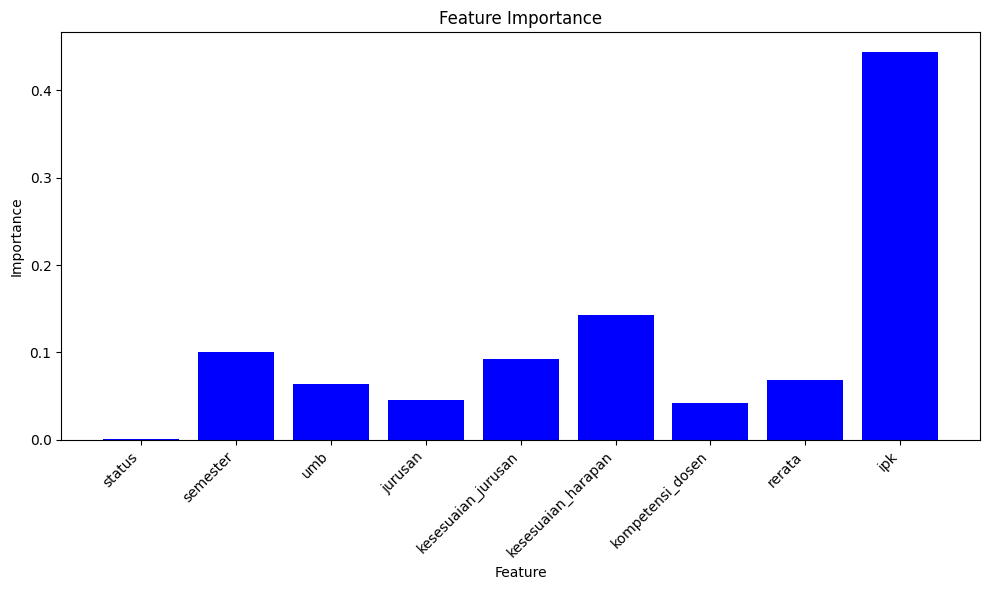

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Pisahkan fitur dan target
X = df.drop('motivasi', axis=1)
y = df['motivasi']

# Membagi data menjadi data pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Membuat model Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Mendapatkan feature importance dari model
feature_importance = rf_model.feature_importances_

# Membuat dataframe untuk menyimpan feature importance
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})

# Plot bar
plt.figure(figsize=(10, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'], color='blue')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Tampilkan plot
plt.show()


## DATA MODELLING

Karakteristik data yang dapat ditangani dengan Algoritma Random Forest yaitu dataset dengan banyak fitur, ketidakseimbangan kelas, campuran tipe variabel, dan adanya outliers. Random Forest cenderung menghasilkan akurasi tinggi karena membangun beberapa pohon keputusan dan menggabungkan hasil dengan mengatasi overfitting, mampu menangani data tidak seimbang, tipe data campuran, fitur yang banyak tanpa perlu pemrosesan, dan cenderung memiliki stabilitas model yang cukup meskipun terdapat perubahan pada dataset.

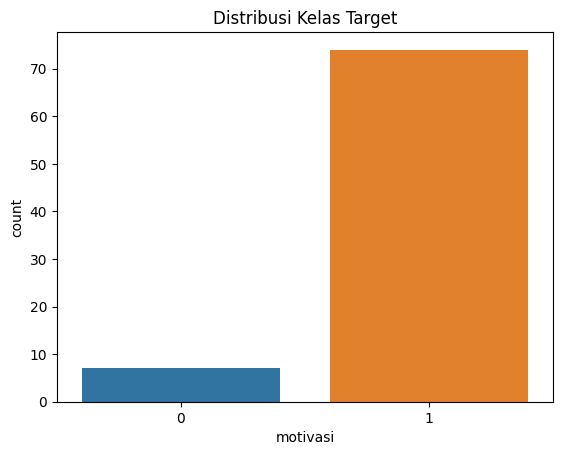

In [ ]:
# Distribusi kelas Motivasi
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='motivasi', data=df)
plt.title('Distribusi Kelas Target')
plt.show()


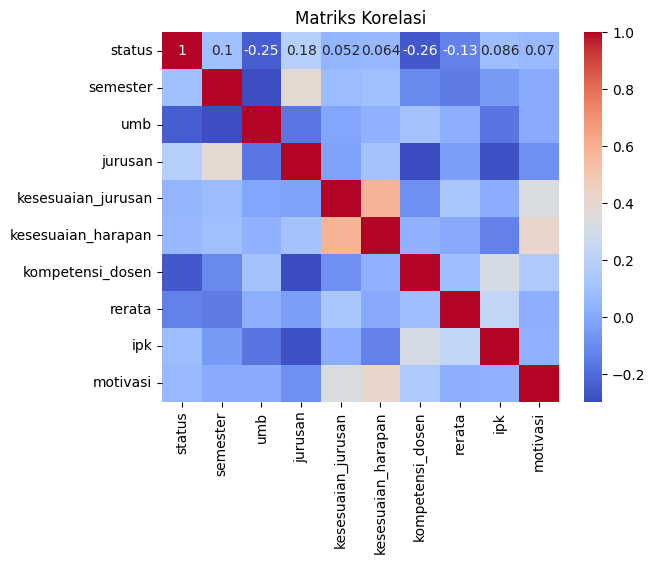

In [ ]:
# Contoh kode
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriks Korelasi')
plt.show()


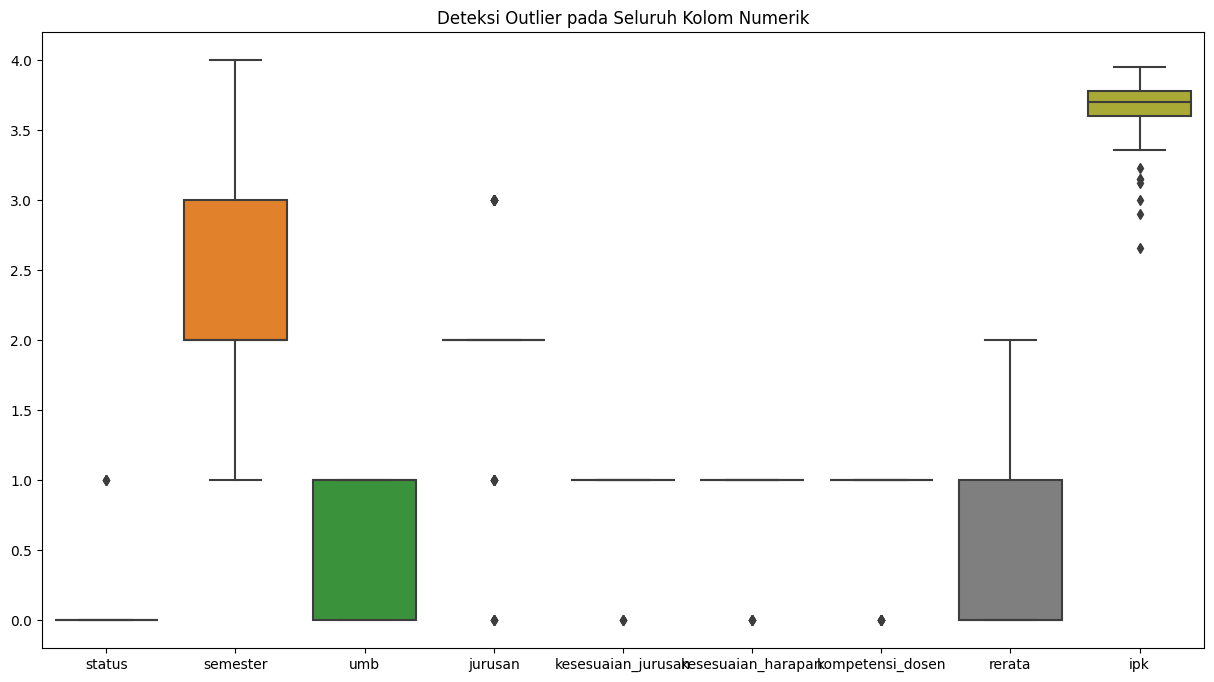

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Pisahkan fitur dan target
X = df.drop(['motivasi'], axis=1)
y = df['motivasi']

# deteksi outlier pada seluruh kolom numerik
plt.figure(figsize=(15, 8))
sns.boxplot(data=X)
plt.title('Deteksi Outlier pada Seluruh Kolom Numerik')
plt.show()


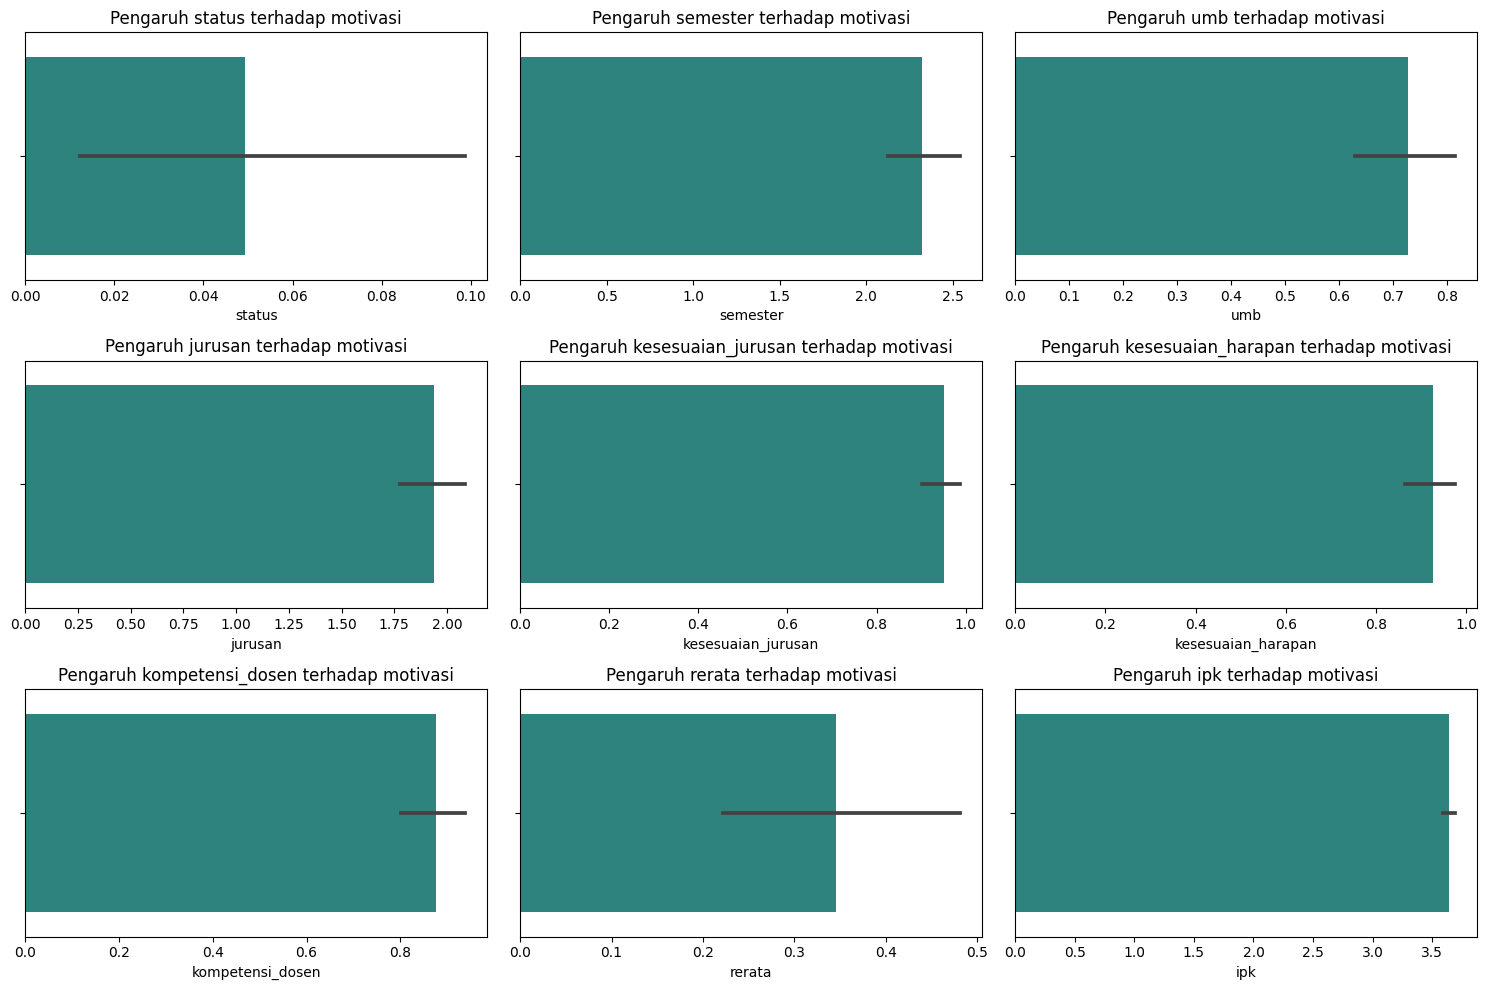

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Pisahkan fitur dan target
X = df.drop(['motivasi'], axis=1)
y = df['motivasi']

plt.figure(figsize=(15, 10))

for i, column in enumerate(X.columns):
    plt.subplot(3, 3, i + 1)


    if isinstance(X[column].iloc[0], str):
        sns.countplot(x=column, hue=y, data=df, palette='viridis')
    else:
        sns.barplot(x=X[column], hue=y, data=df, palette='viridis')

    plt.title(f'Pengaruh {column} terhadap motivasi')

plt.tight_layout()
plt.show()


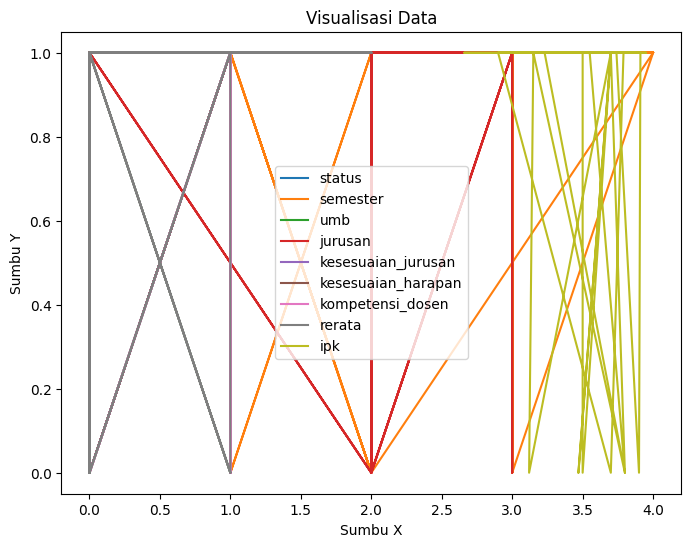

In [ ]:
import matplotlib.pyplot as plt

# Pisahkan fitur dan target
x = df.drop(['motivasi'], axis=1)
y = df['motivasi']

# Membuat kerangka visualisasi
fig, ax = plt.subplots(figsize=(8, 6))

# Menambahkan elemen-elemen pada kerangka
for column in x.columns:
    ax.plot(x[column], y, label=column)

ax.set_title('Visualisasi Data')
ax.set_xlabel('Sumbu X')
ax.set_ylabel('Sumbu Y')
ax.legend()

# Menampilkan grafik
plt.show()


## EVALUASI

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Pisahkan fitur dan target
X = df.drop(['motivasi'], axis=1)
y = df['motivasi']

# Pisahkan data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inisialisasi model
rf_model = RandomForestClassifier()

# Latih model
rf_model.fit(X_train, y_train)

# Prediksi menggunakan set pengujian
rf_pred = rf_model.predict(X_test)

# Evaluasi performa
def evaluate_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    confusion = confusion_matrix(y_true, y_pred)

    print(f"Evaluasi performa untuk {model_name}:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Confusion Matrix:\n{confusion}\n")

# Evaluasi performa untuk setiap model
evaluate_model(y_test, rf_pred, "Random Forest")


Evaluasi performa untuk Random Forest:
Accuracy: 0.8824
Precision: 0.8824
Recall: 1.0000
F1 Score: 0.9375
Confusion Matrix:
[[ 0  2]
 [ 0 15]]




*** Model Performance Evaluation for Random Forest: ***
Accuracy: 0.8824

Classification Report:

Classification Report for Random Forest:

              precision    recall  f1-score    support
0              0.000000  0.000000  0.000000   2.000000
1              0.882353  1.000000  0.937500  15.000000
accuracy       0.882353  0.882353  0.882353   0.882353
macro avg      0.441176  0.500000  0.468750  17.000000
weighted avg   0.778547  0.882353  0.827206  17.000000


C:\Users\rokeu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rokeu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rokeu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

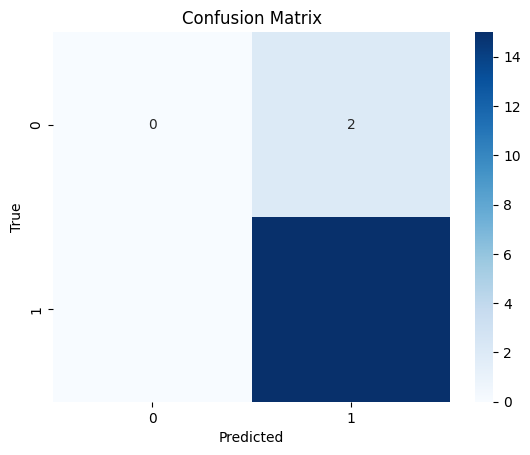

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


# 2. Extract features and target
X = df.drop(["motivasi"], axis=1)
y = df["motivasi"]

# 3. Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Create Random Forest Classifier model
rf_model = RandomForestClassifier()

# 5. Train the model
rf_model.fit(X_train, y_train)


# 6. Evaluate model performance
def evaluate_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    print(f"\n*** Model Performance Evaluation for {model_name}: ***")
    print(f"Accuracy: {accuracy:.4f}")
    print("\nClassification Report:")
    print_classification_report(y_true, y_pred, model_name)  # Berikan argumen model_name
    plot_confusion_matrix(y_true, y_pred)

# Function to print a visually appealing classification report
def print_classification_report(y_true, y_pred, model_name):
    report = classification_report(y_true, y_pred, output_dict=True)
    df_report = pd.DataFrame(report).transpose()
    print(f"\nClassification Report for {model_name}:\n")
    print(df_report.to_string())

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title("Confusion Matrix")
    plt.show()

# 7. Evaluate Random Forest model
evaluate_model(y_test, rf_model.predict(X_test), "Random Forest")  # Berikan nama model


### Menangani Imbalanced-Class

##### Menggunakan Class Weight


*** Model Performance Evaluation for Random Forest: ***
Accuracy: 0.8235

Classification Report:

Classification Report for Random Forest:

              precision    recall  f1-score    support
0              0.000000  0.000000  0.000000   2.000000
1              0.875000  0.933333  0.903226  15.000000
accuracy       0.823529  0.823529  0.823529   0.823529
macro avg      0.437500  0.466667  0.451613  17.000000
weighted avg   0.772059  0.823529  0.796964  17.000000


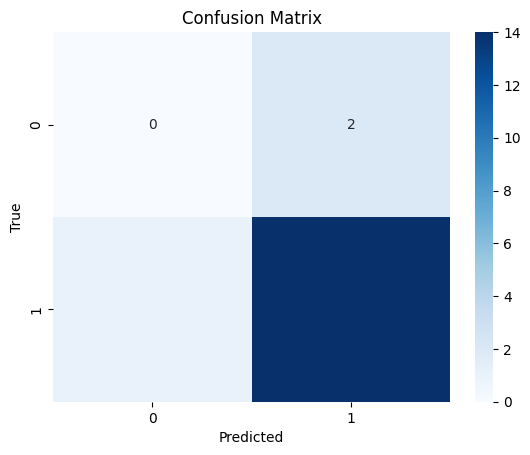

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Extract features and target
X = df.drop(["motivasi"], axis=1)
y = df["motivasi"]

# 3. Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Create Random Forest Classifier model
rf_model = RandomForestClassifier()

# 5. Train the model with Cost-sensitive learning
from sklearn.utils import class_weight

# Hitung bobot kelas secara otomatis
class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)

# Berikan bobot pada sampel saat pelatihan
rf_model.fit(X_train, y_train, sample_weight=class_weights[y_train])

# 6. Evaluate model performance
def evaluate_model(y_true, y_pred, model_name):
    accuracy=accuracy_score(y_true,y_pred)
    print(f"\n*** Model Performance Evaluation for {model_name}: ***")
    print(f"Accuracy: {accuracy:.4f}")
    print("\nClassification Report:")
    print_classification_report(y_true, y_pred, model_name)
    plot_confusion_matrix(y_true, y_pred)

# Function to print a visually appealing classification report
def print_classification_report(y_true, y_pred, model_name):
    report = classification_report(y_true, y_pred, output_dict=True)
    df_report = pd.DataFrame(report).transpose()
    print(f"\nClassification Report for {model_name}:\n")
    print(df_report.to_string())

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred):
    cm=confusion_matrix(y_true,y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title("Confusion Matrix")
    plt.show()

# 7. Evaluate Random Forest model
evaluate_model(y_test, rf_model.predict(X_test), "Random Forest")


##### Menentukan threshold terbaik

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

# Assuming you have a dataframe 'df' with features and target variable 'motivasi'
X = df.drop('motivasi', axis=1)
y = df['motivasi']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest classifier (you can replace this with your actual model)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Get predicted probabilities
y_pred_proba = model.predict_proba(X_test)

# List nilai threshold yang ingin dicoba
thresholds = [0.5, 0.6, 0.7, 0.8, 0.9]

# Inisialisasi dictionary untuk menyimpan kinerja model
performance_results = {}

for threshold_value in thresholds:
    # Menggunakan threshold untuk membuat prediksi berdasarkan probabilitas
    y_pred_threshold = (y_pred_proba[:, 1] > threshold_value).astype(int)

    # Evaluasi model dengan threshold yang telah ditentukan
    accuracy = accuracy_score(y_test, y_pred_threshold)
    precision = precision_score(y_test, y_pred_threshold)
    recall = recall_score(y_test, y_pred_threshold)
    f1 = f1_score(y_test, y_pred_threshold)

    # Menyimpan hasil kinerja
    performance_results[threshold_value] = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1 Score': f1}

# Menampilkan hasil kinerja untuk setiap threshold
for threshold, results in performance_results.items():
    print(f"### Threshold: {threshold} ###")
    print("Accuracy:", results['Accuracy'])
    print("Precision:", results['Precision'])
    print("Recall:", results['Recall'])
    print("F1 Score:", results['F1 Score'])
    print()


### Threshold: 0.5 ###
Accuracy: 0.8823529411764706
Precision: 0.8823529411764706
Recall: 1.0
F1 Score: 0.9375

### Threshold: 0.6 ###
Accuracy: 0.8823529411764706
Precision: 0.8823529411764706
Recall: 1.0
F1 Score: 0.9375

### Threshold: 0.7 ###
Accuracy: 0.8235294117647058
Precision: 0.875
Recall: 0.9333333333333333
F1 Score: 0.9032258064516129

### Threshold: 0.8 ###
Accuracy: 0.8823529411764706
Precision: 0.9333333333333333
Recall: 0.9333333333333333
F1 Score: 0.9333333333333333

### Threshold: 0.9 ###
Accuracy: 0.7647058823529411
Precision: 0.9230769230769231
Recall: 0.8
F1 Score: 0.8571428571428571



##### Menggunakan Threshold Zero-Division untuk menangani class tidak terbaca

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Memisahkan fitur dan target
X = df.drop('motivasi', axis=1)
y = df['motivasi']

# Membagi data menjadi data pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Membuat model Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Memprediksi probabilitas kelas positif pada set pengujian
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]

# Menentukan nilai threshold (misalnya, 0.6)
threshold_value = 0.6

# Menggunakan threshold untuk membuat prediksi berdasarkan probabilitas
y_pred_threshold = (y_pred_proba > threshold_value).astype(int)

# Evaluasi model dengan threshold yang telah ditentukan
accuracy_rf_threshold = accuracy_score(y_test, y_pred_threshold)
classification_rep_rf_threshold = classification_report(y_test, y_pred_threshold, zero_division=1)

print("### Random Forest dengan Threshold ###")
print(f"Accuracy: {accuracy_rf_threshold}")
print("Classification Report:\n", classification_rep_rf_threshold)


### Random Forest dengan Threshold ###
Accuracy: 0.8823529411764706
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.00      0.00         2
           1       0.88      1.00      0.94        15

    accuracy                           0.88        17
   macro avg       0.94      0.50      0.47        17
weighted avg       0.90      0.88      0.83        17



##### Menggunakan Oversampling Teknik SMOTE dan Threshold Zero-Division untuk menangani class tidak terbaca

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE

# Memisahkan fitur dan target
X = df.drop('motivasi', axis=1)
y = df['motivasi']

# Membagi data menjadi data pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Periksa jumlah sampel terkecil dalam kelas minoritas dan sesuaikan n_neighbors
minority_class_count = min(y_train.value_counts())  # Get the count of the smallest class
smote = SMOTE(k_neighbors=min(minority_class_count - 1, 5), random_state=42)  # Set n_neighbors appropriately

# Terapkan SMOTE pada set pelatihan
X_train_oversampled, y_train_oversampled = smote.fit_resample(X_train, y_train)

# Membuat model Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_oversampled, y_train_oversampled)

# Memprediksi probabilitas kelas positif pada set pengujian
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]

# Menentukan nilai threshold (misalnya, 0.6)
threshold_value = 0.6

# Menggunakan threshold untuk membuat prediksi berdasarkan probabilitas
y_pred_threshold = (y_pred_proba > threshold_value).astype(int)

# Evaluasi model dengan threshold yang telah ditentukan
accuracy_rf_threshold = accuracy_score(y_test, y_pred_threshold)
classification_rep_rf_threshold = classification_report(y_test, y_pred_threshold, zero_division=1)

print("### Random Forest dengan Oversampling dan Threshold ###")
print(f"Accuracy: {accuracy_rf_threshold}")
print("Classification Report:\n", classification_rep_rf_threshold)


### Random Forest dengan Oversampling dan Threshold ###
Accuracy: 0.8235294117647058
Classification Report:
               precision    recall  f1-score   support

           0       0.33      0.50      0.40         2
           1       0.93      0.87      0.90        15

    accuracy                           0.82        17
   macro avg       0.63      0.68      0.65        17
weighted avg       0.86      0.82      0.84        17



##### Menggunakan Ensemble Learning

In [ ]:
import pandas as pd  # Mengimpor library pandas untuk pemrosesan data
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


# Memisahkan fitur dan target
X = df.drop('motivasi', axis=1)
y = df['motivasi']

# Membagi data menjadi data pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Buat model Random Forest
rf1 = RandomForestClassifier(random_state=42)
rf2 = RandomForestClassifier(random_state=43)
rf3 = RandomForestClassifier(random_state=44)

# Latih model
rf1.fit(X_train, y_train)
rf2.fit(X_train, y_train)
rf3.fit(X_train, y_train)

# Buat prediksi
y_pred1 = rf1.predict(X_test)
y_pred2 = rf2.predict(X_test)
y_pred3 = rf3.predict(X_test)

# Kombinasikan prediksi
y_pred_ensemble = (y_pred1 + y_pred2 + y_pred3) / 3

# Evaluasi model
accuracy_ensemble = accuracy_score(y_test, y_pred_ensemble)
classification_report_ensemble = classification_report(y_test, y_pred_ensemble, zero_division=1)

print("### Ensemble Learning dengan Random Forest ###")
print(f"Accuracy: {accuracy_ensemble}")
print("Classification Report:\n", classification_report_ensemble)


### Ensemble Learning dengan Random Forest ###
Accuracy: 0.8823529411764706
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.00      0.00         2
           1       0.88      1.00      0.94        15

    accuracy                           0.88        17
   macro avg       0.94      0.50      0.47        17
weighted avg       0.90      0.88      0.83        17



##### Mencari parameter tunning terbaik

In [ ]:
import pandas as pd  # Mengimpor library pandas untuk pemrosesan data
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Memisahkan fitur dan target
X = df.drop('motivasi', axis=1)
y = df['motivasi']

# Menentukan nilai parameter yang akan diuji
n_estimators_list = [10, 20, 50, 100, 200, 300]
max_depth_list = [3, 4, 5, 6, 7, 8]

# Melakukan tuning parameter
for n_estimators in n_estimators_list:
    for max_depth in max_depth_list:
        # Membagi data menjadi data pelatihan dan pengujian
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Buat model Random Forest
        rf_model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=42)

        # Latih model
        rf_model.fit(X_train, y_train)

        # Evaluasi model
        accuracy = accuracy_score(y_test, rf_model.predict(X_test))
        classification_report = classification_report(y_test, rf_model.predict(X_test), zero_division=1)

        # Cetak hasil
        print(f"n_estimators={n_estimators}, max_depth={max_depth}")
        print(f"Accuracy: {accuracy}")
        print(classification_report)


n_estimators=10, max_depth=3
Accuracy: 0.8823529411764706
              precision    recall  f1-score   support

           0       1.00      0.00      0.00         2
           1       0.88      1.00      0.94        15

    accuracy                           0.88        17
   macro avg       0.94      0.50      0.47        17
weighted avg       0.90      0.88      0.83        17



TypeError: 'str' object is not callable

In [ ]:
import pandas as pd  # Mengimpor library pandas untuk pemrosesan data
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Memisahkan fitur dan target
X = df.drop('motivasi', axis=1)
y = df['motivasi']

# Membagi data menjadi data pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Buat model Random Forest
rf_model = RandomForestClassifier(n_estimators=20, max_depth=3, random_state=42)

# Latih model
rf_model.fit(X_train, y_train)

# Evaluasi model
accuracy = accuracy_score(y_test, rf_model.predict(X_test))
classification_report = classification_report(y_test, rf_model.predict(X_test), zero_division=1)

# Cetak hasil
print(f"Accuracy: {accuracy}")
print(classification_report)


Accuracy: 0.8823529411764706
              precision    recall  f1-score   support

           0       1.00      0.00      0.00         2
           1       0.88      1.00      0.94        15

    accuracy                           0.88        17
   macro avg       0.94      0.50      0.47        17
weighted avg       0.90      0.88      0.83        17



### KESIMPULAN

1. Sebelum Penanganan Ketidakseimbangan Kelas:
   Model memiliki kinerja baik pada kelas mayoritas (kelas 1), tetapi mengalami kesulitan mengenali kelas minoritas (kelas 0)
   Precision, recall, dan f1-score untuk kelas 0 semuanya bernilai 0, menunjukkan kesulitan model dalam mengidentifikasi instans dari kelas tersebut.
   Macro average dan weighted average menunjukkan ketidakseimbangan performa model. Evaluasi lebih rinci melalui classification report mengungkapkan bahwa model tidak efektif dalam mengidentifikasi kelas minoritas (kelas 0) dengan recall dan f1-score yang rendah untuk kelas tersebut. Fokus utama model tampaknya tertuju pada kelas mayoritas (kelas 1), yang ditandai dengan nilai precision, recall, dan f1-score yang tinggi untuk kelas tersebut.

2. Precision untuk kelas 0 meningkat menjadi 100%, tetapi recall tetap 0%, menandakan bahwa model dapat mengidentifikasi kelas 0 secara sempurna
tetapi masih tidak dapat mengenali seluruh instans dari kelas tersebut.
Akurasi tetap tinggi pada 88.24%, namun, perbaikan terutama terjadi pada presisi untuk kelas 0.
Meskipun terjadi peningkatan dalam precision untuk kelas 0, macro average dan weighted average masih menunjukkan ketidakseimbangan performa model.
Terdapat peningkatan yang signifikan dalam recall dan f1-score untuk kelas tersebut. Meskipun demikian, terdapat trade-off yang dapat diamati, terutama dalam menurunnya nilai precision untuk kelas mayoritas. Ini menunjukkan bahwa model sekarang lebih cenderung untuk memprediksi sampel sebagai kelas mayoritas, yang dapat memiliki konsekuensi pada presisi keseluruhan model.